In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf

# Read in the data
df = pd.read_csv('Datasets/dataset_mood_smartphone.csv')

#split date and time
df['date'] = pd.to_datetime(df['time']).dt.date
df['time'] = pd.to_datetime(df['time']).dt.time

grouped_df = df.groupby(['id', 'date', 'time', 'variable']).sum().reset_index()

#create dataframe of values per id per date per time
df = grouped_df.pivot_table(index=['id', 'date', 'time'], columns='variable', values='value')

# Apply different aggregation functions to different variables
agg_dict = {'mood': 'mean', 'circumplex.arousal': 'mean', 'circumplex.valence': 'mean', 'activity': 'mean', 'screen': 'sum', 'call': 'sum', 'sms': 'sum', 'appCat.builtin': 'sum', 'appCat.communication': 'sum', 'appCat.entertainment': 'sum', 'appCat.finance': 'sum', 'appCat.game': 'sum', 'appCat.office': 'sum', 'appCat.other': 'sum', 'appCat.social': 'sum', 'appCat.travel': 'sum', 'appCat.unknown': 'sum', 'appCat.weather': 'sum', 'appCat.utilities': 'sum'}

# Create df where some of the columns values are summed and for some the mean is taken for each day
df = df.groupby(['date', 'id']).agg(agg_dict).reset_index()


variable,date,id,mood,circumplex.arousal,circumplex.valence,activity,screen,call,sms,appCat.builtin,...,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.weather,appCat.utilities
0,2014-02-17,AS14.01,NaN,NaN,NaN,NaN,0.000000,2.0,0.0,0.000,...,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.000
23,2014-02-18,AS14.01,NaN,NaN,NaN,NaN,0.000000,1.0,0.0,0.000,...,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.000
44,2014-02-19,AS14.01,NaN,NaN,NaN,NaN,0.000000,7.0,2.0,0.000,...,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.000
64,2014-02-20,AS14.01,NaN,NaN,NaN,NaN,0.000000,2.0,3.0,0.000,...,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.000
82,2014-02-21,AS14.01,NaN,NaN,NaN,NaN,0.000000,0.0,1.0,0.000,...,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1705,2014-05-01,AS14.01,8.0,-0.4,1.0,0.037065,15516.951998,7.0,4.0,1876.113,...,470.866,1321.104,0.0,28.098,44.430,4918.942,0.000,0.000,0.0,269.569
1731,2014-05-02,AS14.01,7.6,-0.2,0.8,0.077341,15088.519001,0.0,0.0,795.436,...,352.888,1069.748,0.0,0.000,32.443,771.266,0.000,0.000,0.0,11.083
1757,2014-05-03,AS14.01,8.0,-0.2,1.0,0.071741,8186.036001,0.0,1.0,753.257,...,2761.950,296.313,0.0,0.000,40.569,205.602,143.631,30.102,0.0,125.605
1783,2014-05-04,AS14.01,8.0,-0.5,1.0,0.136192,5889.194999,0.0,0.0,1758.438,...,928.406,0.000,0.0,0.000,35.525,494.677,0.000,0.000,0.0,0.000


In [ ]:
# Read in the data
df = pd.read_csv('Datasets/dataset_mood_smartphone.csv')

df['time'] = pd.to_datetime(df['time'])

grouped_df = df.groupby(['id', 'time', 'variable']).sum().reset_index()

#create dataframe of values per id per date per time
df = grouped_df.pivot_table(index=['id', 'time'], columns='variable', values='value')

# Check if the time using an application exceeds the difference between the measurement in time
def diff_time(df):
    # Create a new column that contains the difference between the time and the time of the next measurement
    df['datetime_next'] = df.groupby(['id'])['time'].shift(-1)
    df['datetime_next'] = pd.to_datetime(df['datetime_next'])
    df['diff_time'] = (df['datetime_next'] - df['time']).dt.total_seconds()

    # Create a new column that contains the sum of the time using an application
    df['sum_time'] = df['appCat.builtin'] + df['appCat.communication'] + df['appCat.entertainment'] + df['appCat.finance'] + df['appCat.game'] + df['appCat.office'] + df['appCat.other'] + df['appCat.social'] + df['appCat.travel'] + df['appCat.unknown'] + df['appCat.utilities'] + df['appCat.weather']

    # Check if the difference between the time and the time of the next measurement is smaller than the sum of the time using an application
    return df[df['diff_time'] < df['sum_time']]

df = diff_time(df)
df

In [3]:
location = df.loc[df['id'] == 'AS14.22']
location

variable,date,id,mood,circumplex.arousal,circumplex.valence,activity,screen,call,sms,appCat.builtin,...,appCat.entertainment,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.weather,appCat.utilities


In [38]:
app_times = ['appCat.builtin','appCat.communication','appCat.entertainment','appCat.finance','appCat.game','appCat.office','appCat.other','appCat.social','appCat.travel','appCat.unknown','appCat.utilities','appCat.weather']

# Sum the values in the specified columns and create a new column 'app_times_sum'
df_pivot['sum_screentime'] = df_pivot[app_times].sum(axis=1)

df_pivot['overdue_time'] = df_pivot['screen'] - df_pivot['sum_screentime']

df_pivot

variable            activity  appCat.builtin  appCat.communication  \
time_hour  id                                                        
2014-02-17 AS14.02       NaN             NaN                   NaN   
           AS14.06       NaN             NaN                   NaN   
           AS14.09       NaN             NaN                   NaN   
           AS14.14       NaN             NaN                   NaN   
           AS14.16       NaN             NaN                   NaN   
...                      ...             ...                   ...   
2014-06-05 AS14.24  1.510372         843.588              4203.992   
2014-06-06 AS14.24  3.801124        1856.035              1358.551   
2014-06-07 AS14.24  5.349713        5314.422              1254.974   
2014-06-08 AS14.24  0.602705         686.255               739.230   
2014-06-09 AS14.24  0.250000             NaN                   NaN   

variable            appCat.entertainment  appCat.finance  appCat.game  \
time_hour  id                                                           
2014-02-17 AS14.02                   NaN             NaN          NaN   
           AS14.06                   NaN             NaN          NaN   
           AS14.09                   NaN             NaN          NaN   
           AS14.14                   NaN             NaN          NaN   
           AS14.16                   NaN             NaN          NaN   
...                                  ...             ...          ...   
2014-06-05 AS14.24                   NaN             NaN          NaN   
2014-06-06 AS14.24                   NaN             NaN          NaN   
2014-06-07 AS14.24                   NaN             NaN          NaN   
2014-06-08 AS14.24                   NaN             NaN          NaN   
2014-06-09 AS14.24                   NaN             NaN          NaN   

variable            appCat.office  appCat.other  appCat.social  appCat.travel  \
time_hour  id                                                                   
2014-02-17 AS14.02            NaN           NaN            NaN            NaN   
           AS14.06            NaN           NaN            NaN            NaN   
           AS14.09            NaN           NaN            NaN            NaN   
           AS14.14            NaN           NaN            NaN            NaN   
           AS14.16            NaN           NaN            NaN            NaN   
...                           ...           ...            ...            ...   
2014-06-05 AS14.24            NaN        43.519         87.047            NaN   
2014-06-06 AS14.24            NaN        41.542        153.855        225.737   
2014-06-07 AS14.24            NaN        29.194            NaN            NaN   
2014-06-08 AS14.24            NaN        24.283        297.610            NaN   
2014-06-09 AS14.24            NaN           NaN            NaN            NaN   

variable            ...  appCat.utilities  appCat.weather  call  \
time_hour  id       ...                                           
2014-02-17 AS14.02  ...               NaN             NaN   1.0   
           AS14.06  ...               NaN             NaN   2.0   
           AS14.09  ...               NaN             NaN   2.0   
           AS14.14  ...               NaN             NaN   NaN   
           AS14.16  ...               NaN             NaN   1.0   
...                 ...               ...             ...   ...   
2014-06-05 AS14.24  ...               NaN             NaN   3.0   
2014-06-06 AS14.24  ...             2.072             NaN  11.0   
2014-06-07 AS14.24  ...               NaN             NaN  14.0   
2014-06-08 AS14.24  ...               NaN             NaN   NaN   
2014-06-09 AS14.24  ...               NaN             NaN   NaN   

variable            circumplex.arousal  circumplex.valence  mood       screen  \
time_hour  id                                                                   
2014-02-17 AS14.02                 NaN             

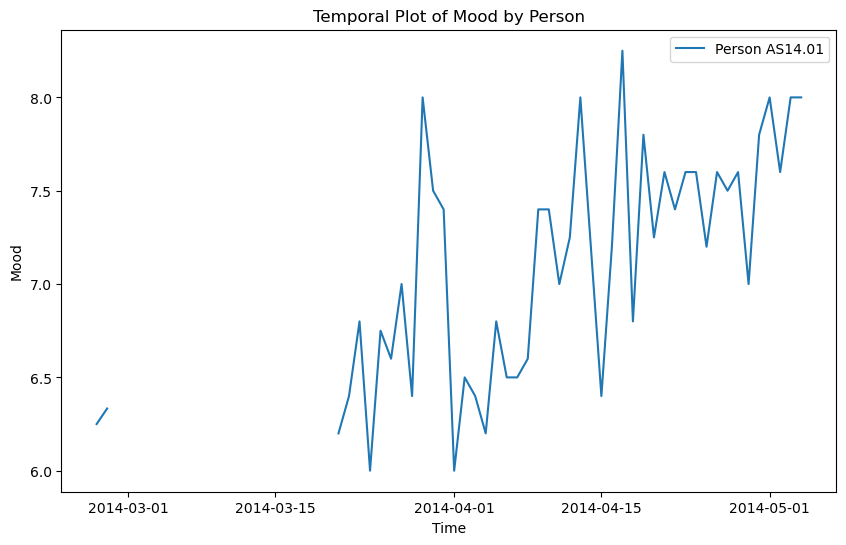

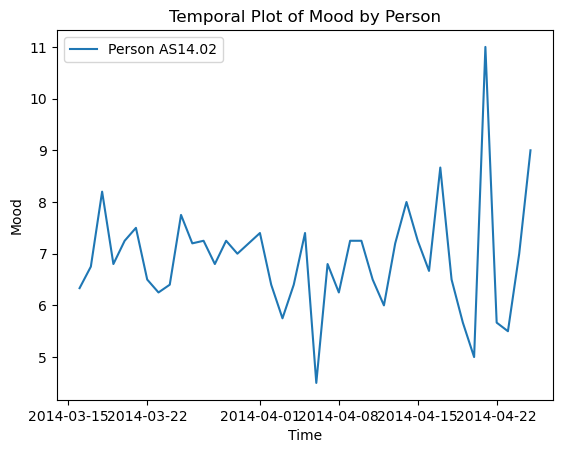

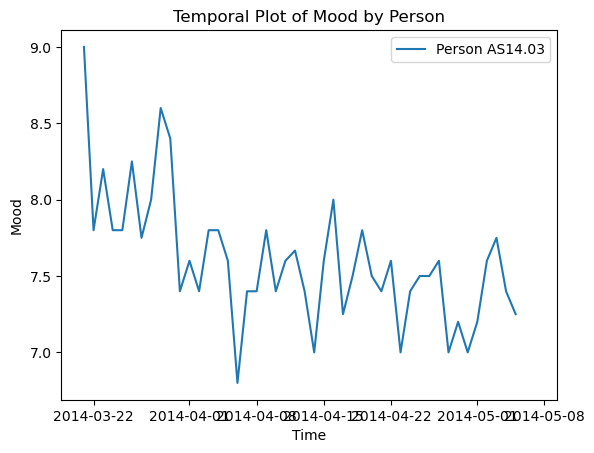

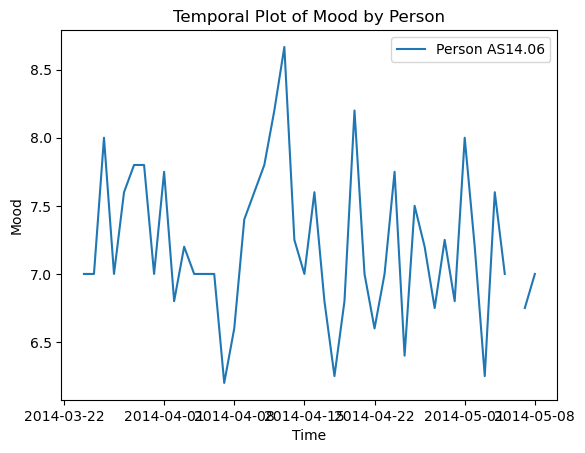

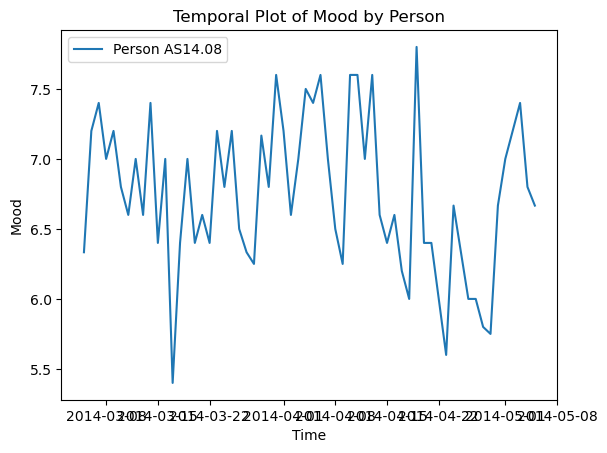

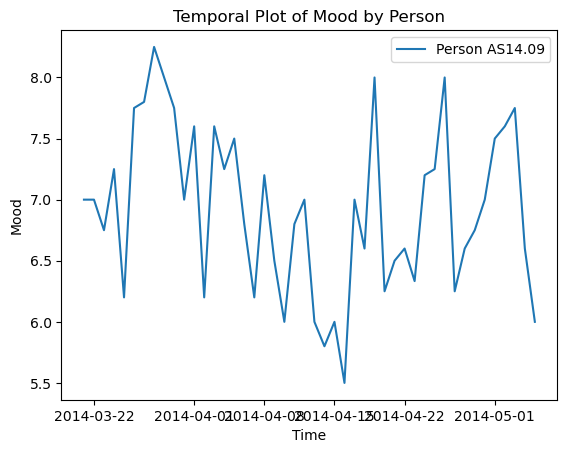

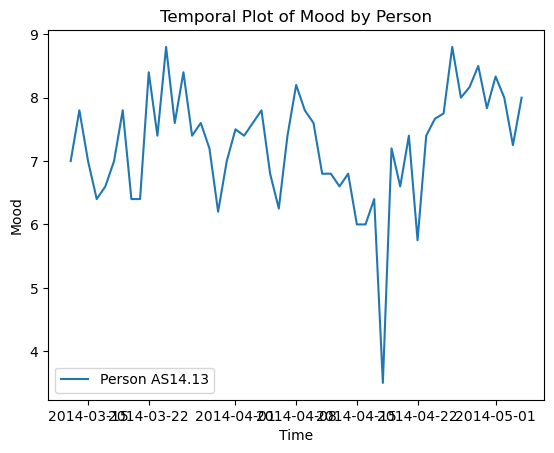

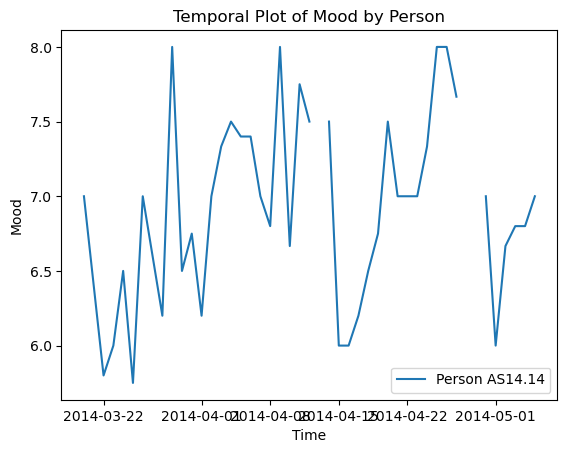

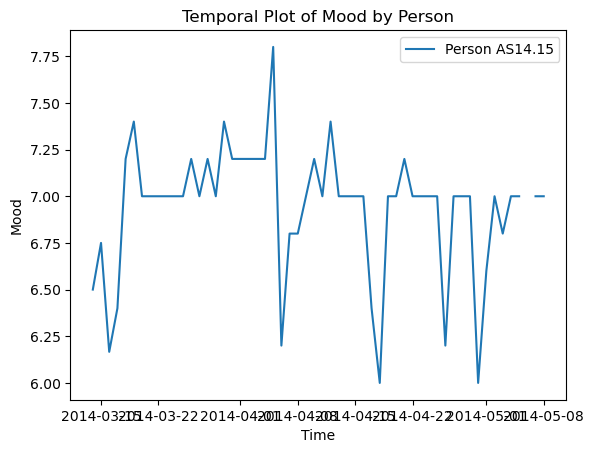

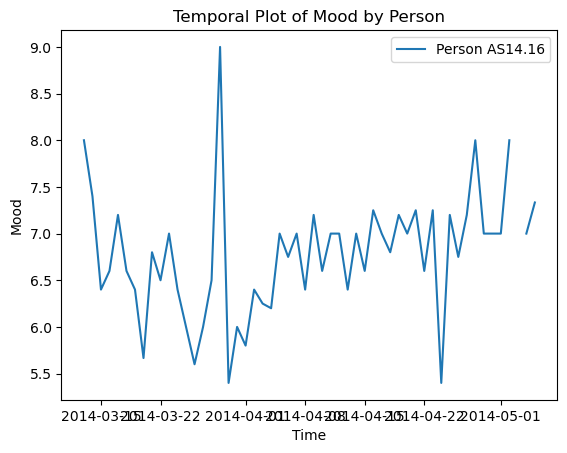

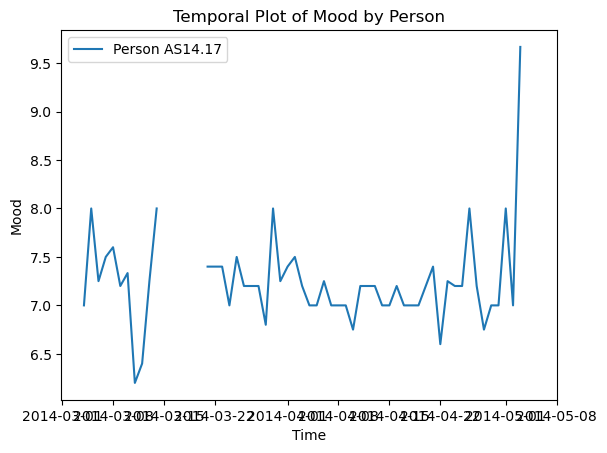

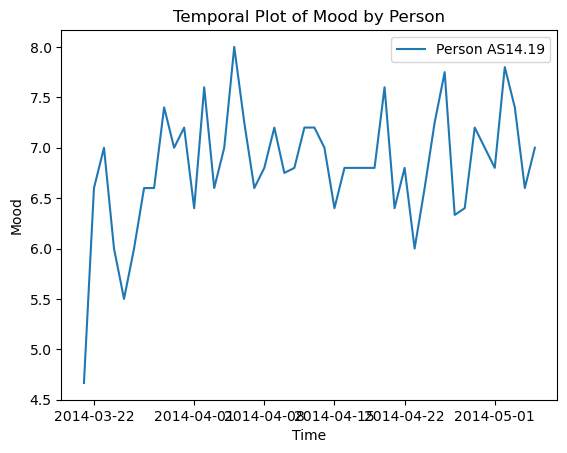

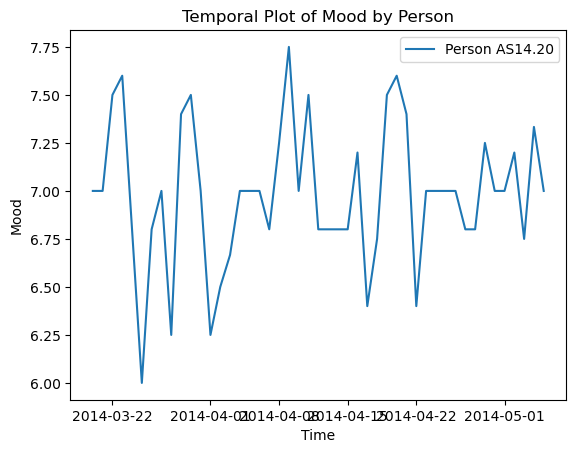

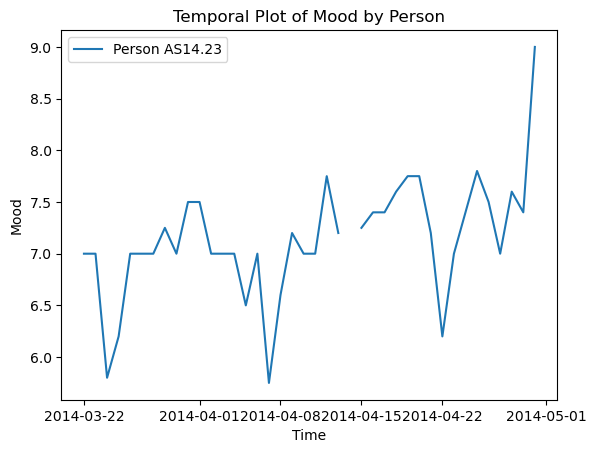

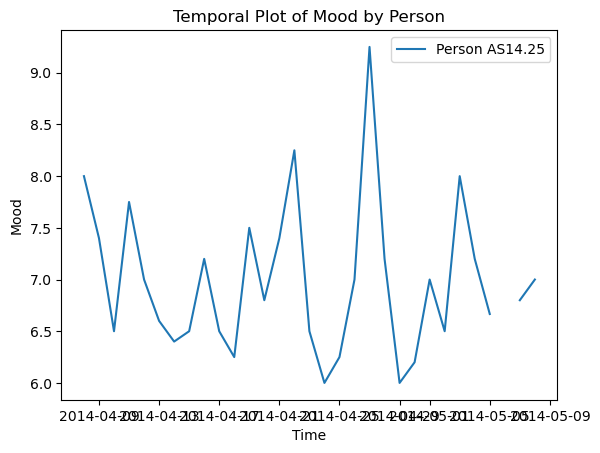

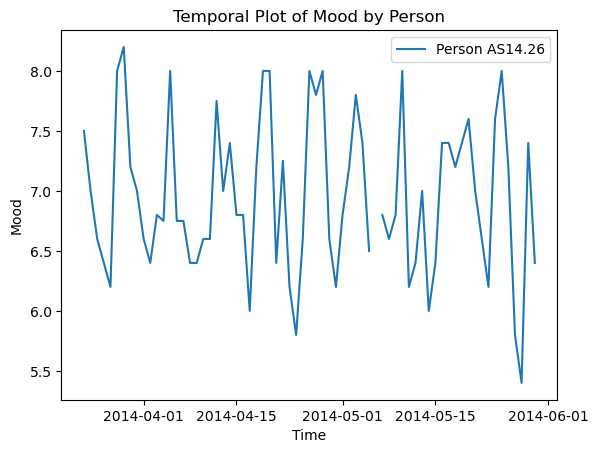

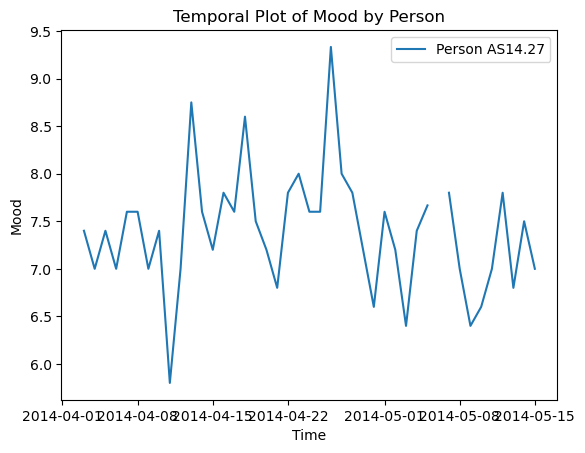

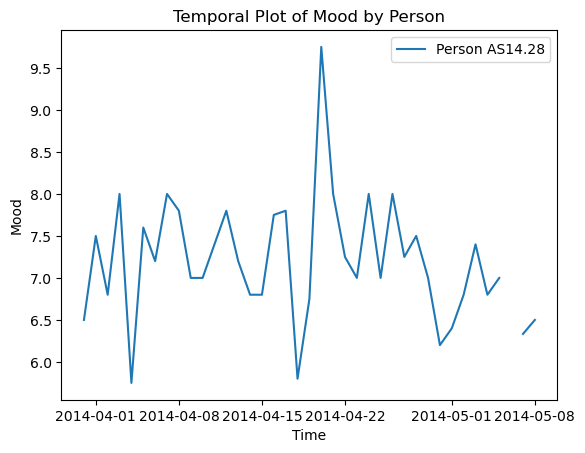

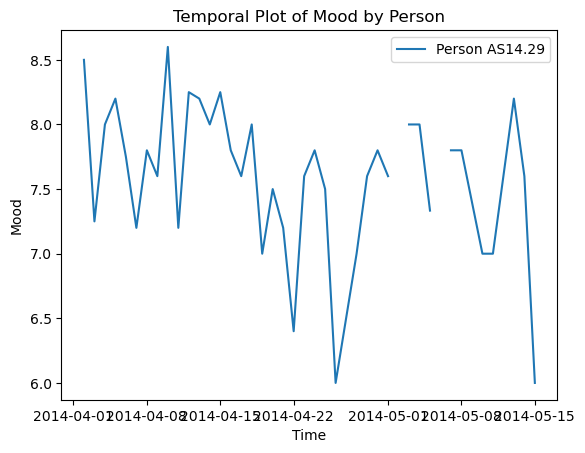

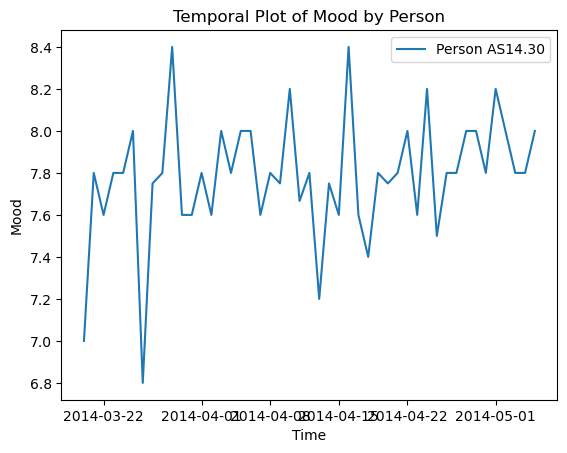

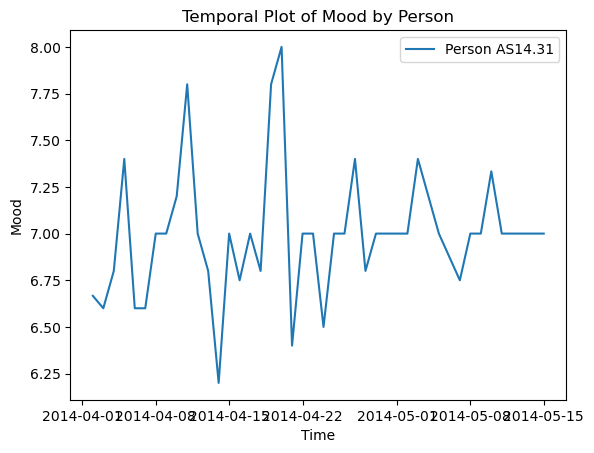

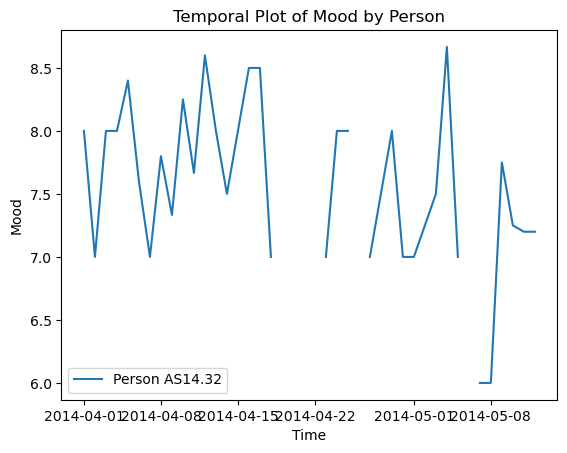

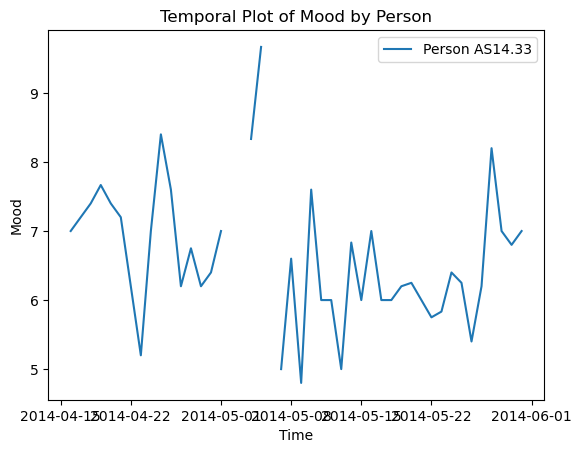

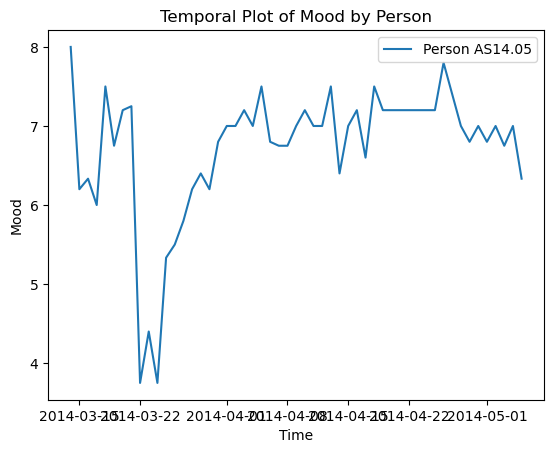

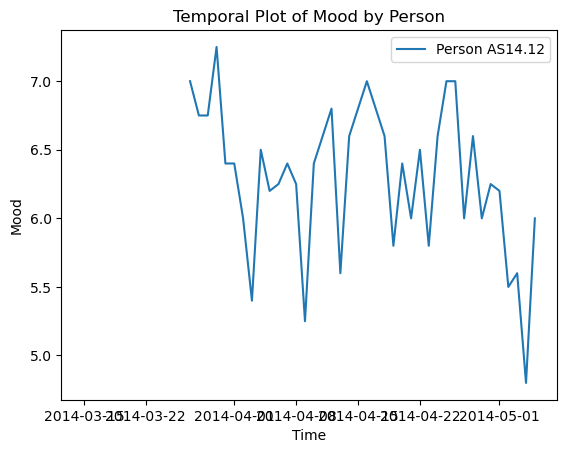

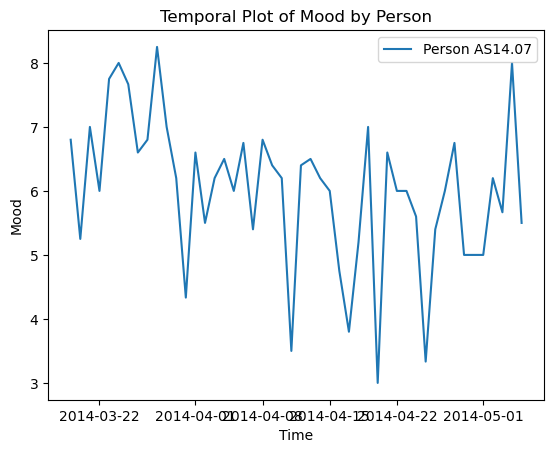

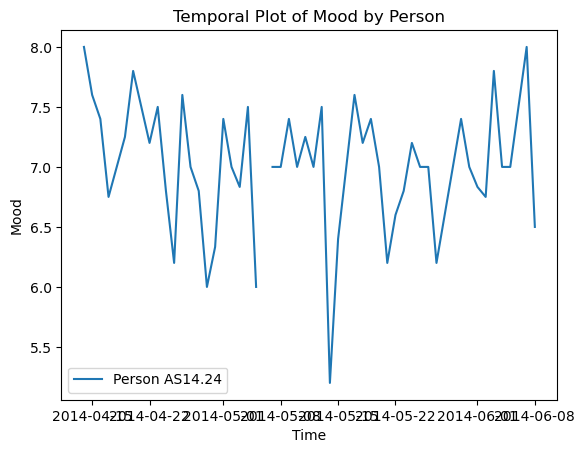

In [5]:
# Reset index to convert multi-index to columns
#df.reset_index(inplace=True)

# Create a list of unique persons
persons = df['id'].unique()

# Plotting
plt.figure(figsize=(10, 6))

# Loop through each person and plot their mood over time
for person in persons:
    df_person = df[df['id'] == person]
    plt.plot(df_person['date'], df_person['mood'], label=f'Person {person}')
    plt.xlabel('Time')
    plt.ylabel('Mood')
    plt.title('Temporal Plot of Mood by Person')
    plt.legend()
    plt.show()





<Figure size 640x480 with 0 Axes>

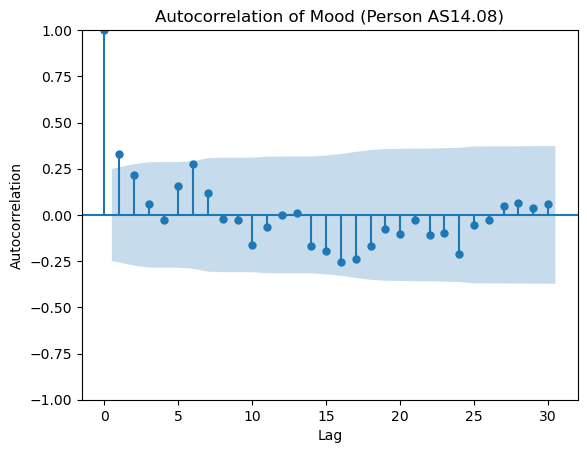

<Figure size 640x480 with 0 Axes>

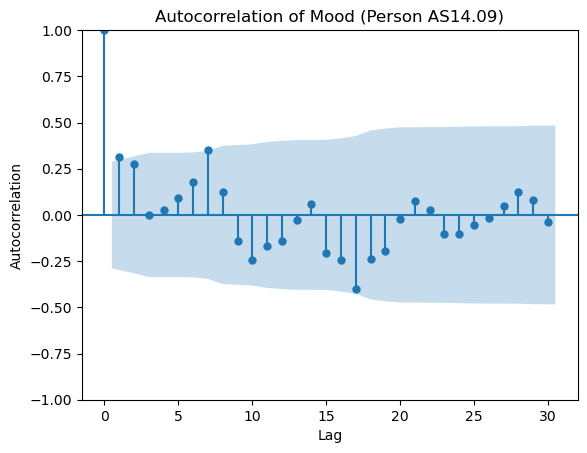

In [7]:
# Loop through each person and plot their mood over time
for person in persons:
    df_person = df[df['id'] == person]
    # plt.plot(df_person['time_hour'], df_person['mood'], label=f'Person {person}')
    # plt.xlabel('Time')
    # plt.ylabel('Mood')
    # plt.title('Mood Over Time')
    # plt.legend()

    # Plot autocorrelation for mood
    plt.figure()
    plot_acf(df_person['mood'].dropna(), lags=30)
    plt.xlabel('Lag')
    plt.ylabel('Autocorrelation')
    plt.title(f'Autocorrelation of Mood (Person {person})')

plt.show()
